In [14]:
import numpy as np
import matplotlib.pyplot as plt
#Options
W = 5.8

params = {'font.size' : 11, 
          'font.family': 'lmodern',# Set font size to 11pt
    'axes.labelsize': 11,  
    'figure.figsize': (W, W/(4/3)), # -> axis labels
    'legend.fontsize': 11,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
          }
plt.rcParams.update(params) 



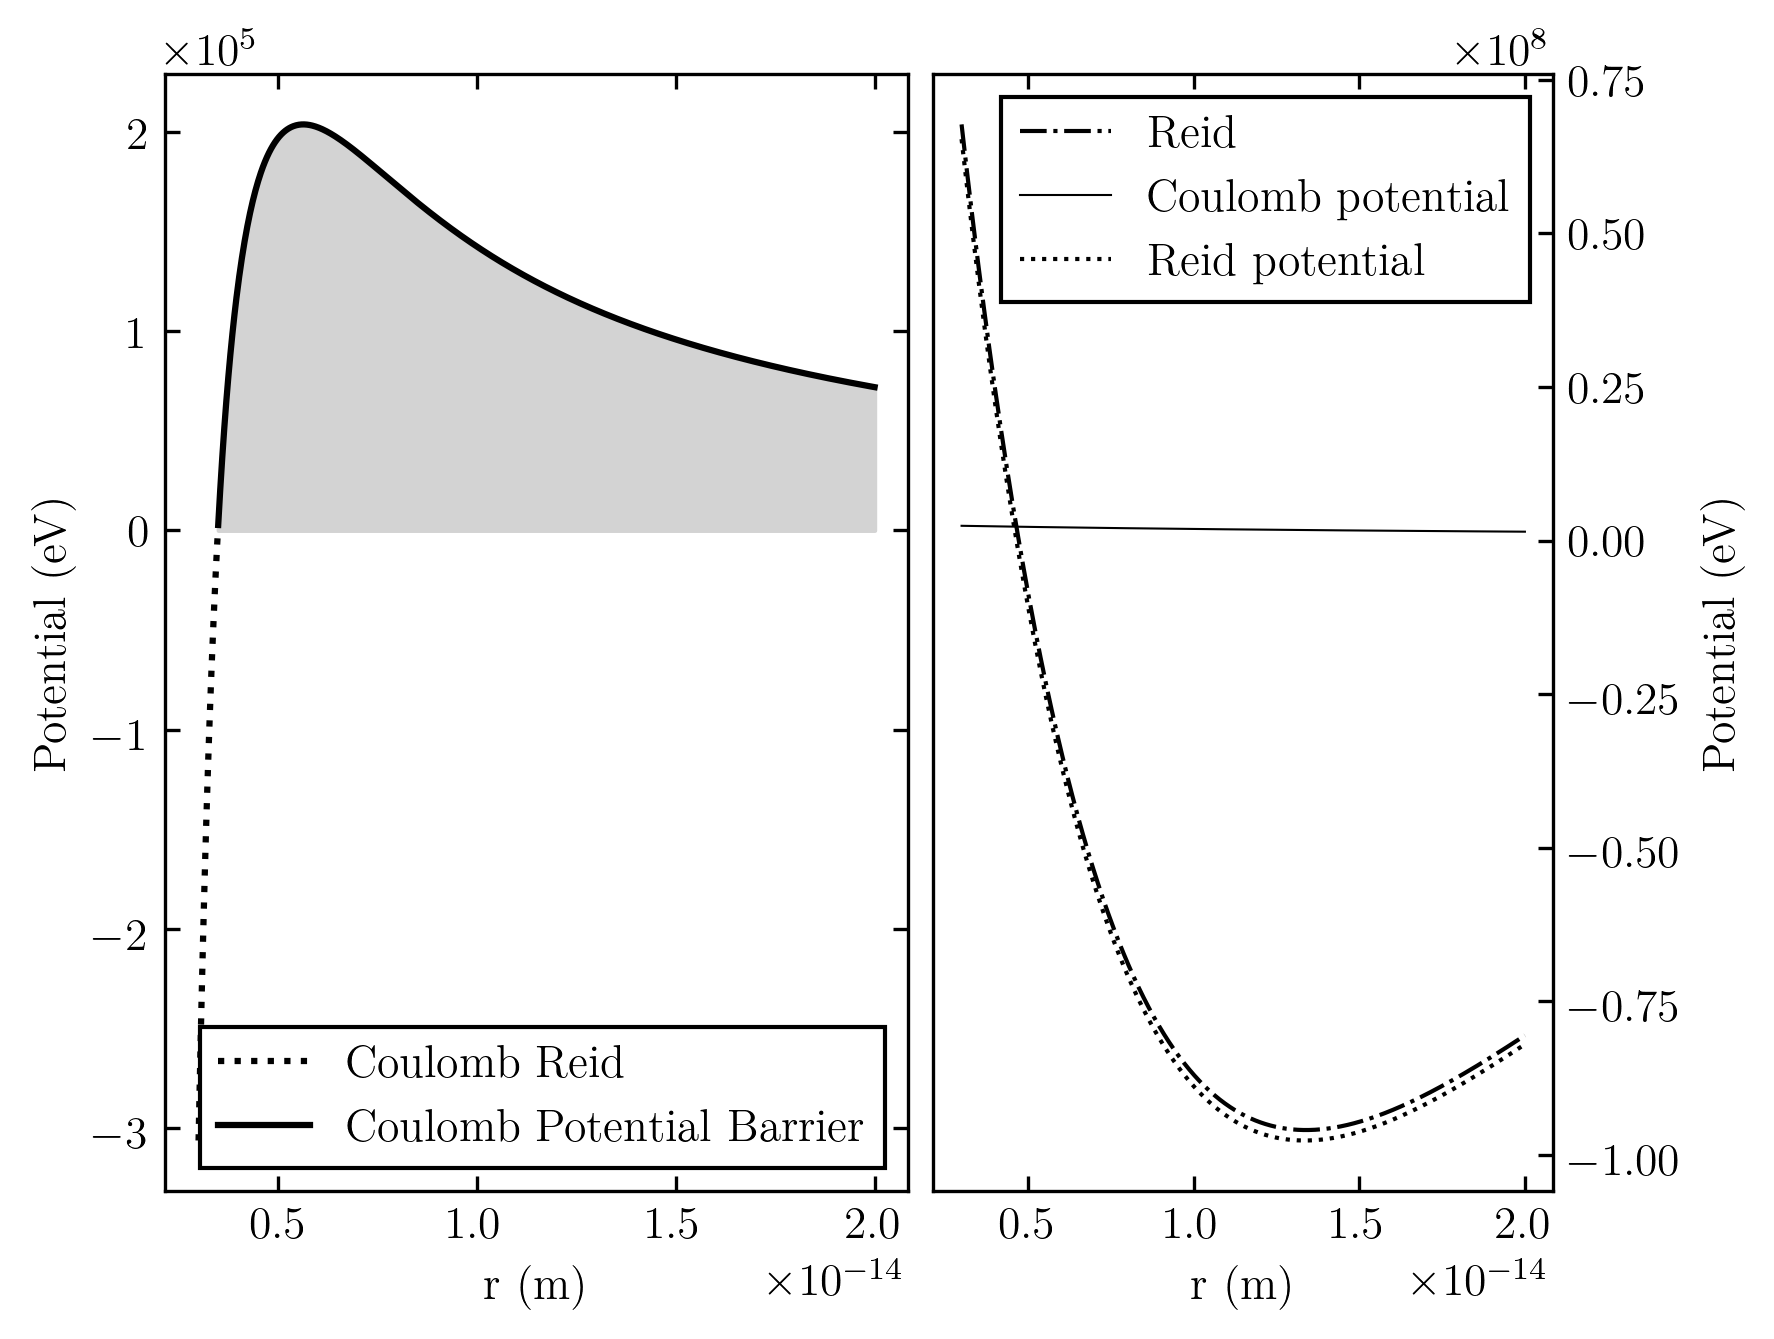

In [22]:
fig, ax = plt.subplots(1, 2, dpi = 300,layout='constrained', width_ratios=[1.2,1])
r = np.linspace(3e-15, 20e-15, 1000)
mu = 0.7e15

Coulomb_potential = lambda r :  1.6e-19 /(4*np.pi*8.854e-12) / r
Reid_potential = lambda r : -10.463 * np.exp(-r*mu) / (r*mu) - 1650.6 * np.exp(-r*mu*4) / (r*mu) + 6468.2 * np.exp(-r*mu*7) / (r*mu)
mask =  Coulomb_potential(r) + Reid_potential(r) * 1e6 > 0

ax[0].plot(r[~mask], Coulomb_potential(r)[~mask] + Reid_potential(r)[~mask] * 1e6, label='Coulomb  Reid', ls = ':', color = 'k')
ax[0].plot(r[mask], Coulomb_potential(r)[mask] + Reid_potential(r)[mask] * 1e6, label='Coulomb Potential Barrier', color = 'k')
ax[0].legend()
ax[0].minorticks_off()
ax[0].fill_between(r, 0, Coulomb_potential(r) + Reid_potential(r) * 1e6, where = Coulomb_potential(r) + Reid_potential(r) * 1e6 > 0, color = 'lightgrey')
ax[0].set_xlabel('r (m)')
ax[0].set_ylabel('Potential (eV)')

ax[0].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
r2 = np.linspace(0.6e-15, 1e-15, 1000)
ax[1].plot(r, Coulomb_potential(r2) + Reid_potential(r2) * 1e6, label='Reid', ls  = '-.', color = 'k', lw = 1)
ax[1].plot(r, Coulomb_potential(r2),  label='Coulomb potential', ls  = '-', color = 'k', lw = .5)
ax[1].plot(r, Reid_potential(r2) * 1e6, label='Reid potential ', ls  = ':', color = 'k', lw = 1)
ax[1].legend()
ax[1].minorticks_off()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_xlabel('r (m)')
ax[1].set_ylabel('Potential (eV)')
plt.savefig('../Report/figures/potential_barrier2.pdf')